<a href="https://colab.research.google.com/github/aqillakhamis/DigitalImageProcessing/blob/master/ColorGrayscaleImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#import dependencies 
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from matplotlib import pyplot

Using TensorFlow backend.


# Color to Grayscale on Single Image

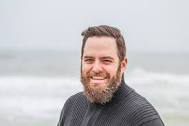

In [3]:
#load the original image 
img = load_img('person.jpg')
width, height = img.size

#display the original image
img

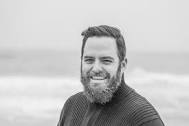

In [6]:
#change to grayscale image
img_gray = img.convert('LA')

#display grayscale image
img_gray

In [7]:
#count average pixel intensity from the image
total_ori = 0
total_gray = 0

for i in range(0, width):
    for j in range(0, height):
        total_ori += img.getpixel((i,j))[0]
        total_gray += img_gray.getpixel((i,j))[0]

mean_ori_init = total_ori / (width * height)
mean_gray_init = total_gray / (width * height)

#print("Average Pixel Intensity Value for Original Image:", mean_ori_init)
print("Average Pixel Intensity Value for Grayscale Image:", mean_gray_init)

Average Pixel Intensity Value for Grayscale Image: 194.47749223146047


# Applying Data Augmentation on Single Image

In [ ]:
#creating different brightness of images 
#applying data augmentation to the original images

#convert to numpy array 
data = img_to_array(img)

#expand dimension to one sample
samples = expand_dims(data, 0)

#create image data augmentation generator 
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

#prepare iterator 
it = datagen.flow(samples, batch_size=1)

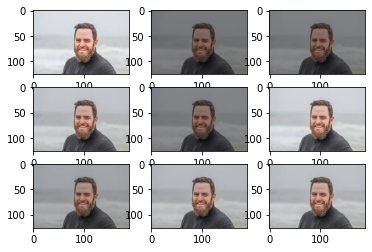

In [ ]:
#plot the generated images and plot
image_size = 9

#generate samples and plot
for i in range(image_size):
  #define subplot for each generated images 
  pyplot.subplot(330 + 1 + i)

  #generate batch of images 
  batch = it.next()

  #convert to unsigned integers for viewing 
  image = batch[0].astype('uint8')

  #save the ndarrays as image file 
  new_img = Image.fromarray(image)
  new_img.save('person{}.jpg'.format(i+1))
  
  #plot raw pixel data 
  pyplot.imshow(image)

#show the figure
pyplot.show()

# Count Grayscale Pixel Average Value

In [ ]:
#convert generated data augmented into grayscale image
def pixel_check(input_image, mean_gray_init, m):
  #load the image 
  #load the original image 
  img = load_img(input_image)
  width, height = img.size

  #change color image to grayscale image
  img_gray = img.convert('LA')

  #count average pixel intensity from the image
  total_ori = 0
  total_gray = 0

  for i in range(0, width):
      for j in range(0, height):
          total_ori += img.getpixel((i,j))[0]
          total_gray += img_gray.getpixel((i,j))[0]

  mean_ori_aug = total_ori / (width * height)
  mean_gray_aug = total_gray / (width * height)

  #print("Average Pixel Intensity Value for Original Image:", mean_ori_aug)
  print("Average Pixel Intensity Value for Grayscale Image {}:".format(m+1), mean_gray_aug)  
  
  #pyplot.imshow(img_gray)

  #compare pixel intensity between original grayscale image & augmented grayscale image 
  if mean_gray_aug > mean_gray_init: 
    print("The Image {} is Bright".format(m+1))
  else: 
    print("The Image {} is Dark".format(m+1))

In [ ]:
#compare the pixel intensity value between original grayscale and augmented grayscale
list_image = ['person1.jpg', 'person2.jpg', 'person3.jpg', 'person4.jpg', 'person5.jpg', 'person6.jpg', 'person7.jpg', 'person8.jpg', 'person9.jpg']
size = len(list_image)

for i in range(size): 
  pixel_check(list_image[i], mean_gray_init, i)

Average Pixel Intensity Value for Grayscale Image 1: 190.92059292852943
The Image 1 is Dark
Average Pixel Intensity Value for Grayscale Image 2: 103.37049634668682
The Image 2 is Dark
Average Pixel Intensity Value for Grayscale Image 3: 110.21164021164022
The Image 3 is Dark
Average Pixel Intensity Value for Grayscale Image 4: 169.42962123120853
The Image 4 is Dark
Average Pixel Intensity Value for Grayscale Image 5: 113.00306542370035
The Image 5 is Dark
Average Pixel Intensity Value for Grayscale Image 6: 182.43193079701015
The Image 6 is Dark
Average Pixel Intensity Value for Grayscale Image 7: 141.05211220290585
The Image 7 is Dark
Average Pixel Intensity Value for Grayscale Image 8: 159.53535735281767
The Image 8 is Dark
Average Pixel Intensity Value for Grayscale Image 9: 165.6997144536827
The Image 9 is Dark
